 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
Whalepath = Path("../Starter_Code/Resources/whale_returns.csv")
Whale_df = pd.read_csv(Whalepath)
Whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
Whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
Whale_df.dropna(inplace=True)
Whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [5]:
Whale_df.set_index(pd.to_datetime(Whale_df['Date'], infer_datetime_format=True), inplace=True)
Whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
Whale_df.drop(columns=['Date'], inplace=True)
Whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
AlgoPath = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(AlgoPath)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [10]:
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


In [11]:
algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500Path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500Path)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [13]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [14]:
# Fix Data Types
def money_conversion(val):
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

In [15]:
sp500_df["Close"] = sp500_df["Close"].apply(money_conversion)
sp500_df.dtypes

Date      object
Close    float64
dtype: object

In [16]:
sp500_df.dtypes

Date      object
Close    float64
dtype: object

In [17]:
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,2933.68
2019-04-22,22-Apr-19,2907.97
2019-04-18,18-Apr-19,2905.03
2019-04-17,17-Apr-19,2900.45
2019-04-16,16-Apr-19,2907.06


In [18]:
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [19]:
# Calculate Daily Returns
sp500_dfs = sp500_df.pct_change()
sp500_dfs.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [20]:
# Drop nulls
sp500_dfs.dropna(inplace=True)
sp500_dfs

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [21]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dfs.rename(columns = {"Close" : "SP 500"}, inplace = True)
sp500_dfs

,SP 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([sp500_dfs,Whale_df, algo_df], axis='columns', join = 'inner')
combined_df.head()

,SP 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-22,-0.008764,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936
2019-04-18,-0.001011,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-17,-0.001577,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-16,0.002279,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-15,-0.000509,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [23]:
# Plot daily returns of all portfolios
daily_returns = combined_df.pct_change()
daily_returns.head()

,SP 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,-0.884637,-1.559965,-1.166626,-1.159757,-2.761467,-1.868976,-0.364991
2019-04-17,0.559400,-3.000629,-6.293097,-8.582317,0.681647,16.521245,3.253330
2019-04-16,-2.445510,-1.931873,-1.060020,-0.811553,-0.740329,-0.325825,-1.554579
2019-04-15,-1.223394,-1.526776,-3.978912,-1.478853,-13.540137,-0.376322,-2.576745


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

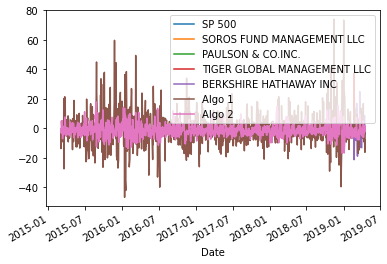

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

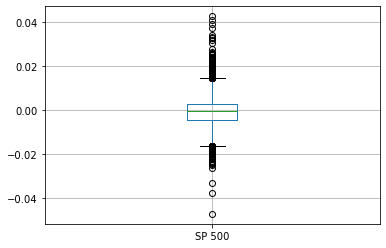

In [25]:
sp500_dfs.boxplot()

<AxesSubplot:>

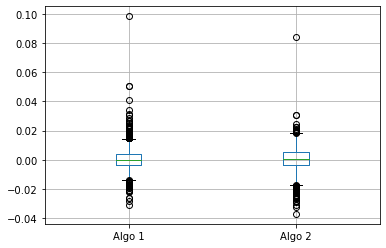

In [26]:
algo_df.boxplot()

<AxesSubplot:>

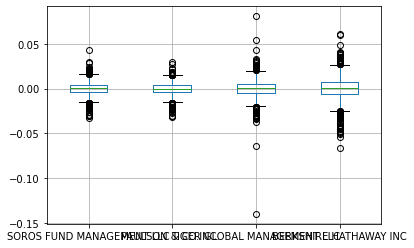

In [27]:
# Box plot to visually show risk
Whale_df.boxplot()

### Calculate Standard Deviations

In [28]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns.std()

SP 500                          0.935011
SOROS FUND MANAGEMENT LLC       2.249328
PAULSON & CO.INC.               0.847636
TIGER GLOBAL MANAGEMENT LLC     6.076648
BERKSHIRE HATHAWAY INC          8.180007
Algo 1                         11.272208
Algo 2                          4.311069
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [29]:
# Calculate  the daily standard deviation of S&P 500
sp500_dfs.std()
# Determine which portfolios are riskier than the S&P 500
combined_df.var()

SP 500                         0.000074
SOROS FUND MANAGEMENT LLC      0.000062
PAULSON & CO.INC.              0.000049
TIGER GLOBAL MANAGEMENT LLC    0.000119
BERKSHIRE HATHAWAY INC         0.000167
Algo 1                         0.000058
Algo 2                         0.000070
dtype: float64

### Calculate the Annualized Standard Deviation

<AxesSubplot:xlabel='Date'>

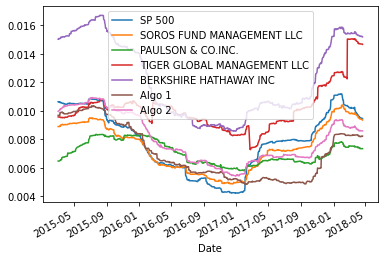

In [30]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.rolling(window=252).std().plot()

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

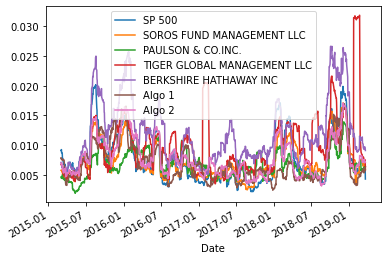

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot()
# Plot the rolling standard deviation

### Calculate and plot the correlation

<AxesSubplot:>

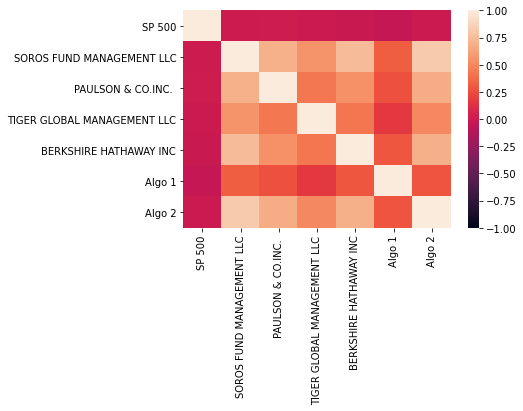

In [32]:
# Calculate the correlation
combined_correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(combined_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [33]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [34]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios


In [36]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [37]:
# Reading data from 1st stock
ebayPath = Path("../Starter_Code/Resources/EBAY-2.csv")
eBay_df = pd.read_csv(ebayPath)
eBay_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-17,56.689999,57.570000,56.299999,57.349998,56.650772,5689900
1,2020-08-18,57.570000,57.880001,56.939999,57.029999,56.334671,4807100
2,2020-08-19,57.150002,58.380001,57.029999,57.709999,57.006386,7208600
3,2020-08-20,57.599998,58.060001,57.160000,57.660000,56.956993,6458400
4,2020-08-21,57.860001,59.060001,57.509998,58.209999,57.500286,6784200


In [38]:
# Reading data from 2nd stock
DoorDashPath = Path("../Starter_Code/Resources/DASH.csv")
Dash_df = pd.read_csv(DoorDashPath)
Dash_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-09,182.000000,195.500000,163.800003,189.509995,189.509995,25373700
1,2020-12-10,179.710007,187.695007,172.636002,186.000000,186.000000,9307600
2,2020-12-11,176.520004,182.000000,168.250000,175.000000,175.000000,4760600
3,2020-12-14,169.100006,170.000000,151.199997,160.000000,160.000000,7859600
4,2020-12-15,157.100006,161.419998,153.759995,158.889999,158.889999,5017000


In [39]:
# Reading data from 3rd stock
WalmartPath = Path('../Starter_Code/Resources/WMMVF-2.csv')
Walmart_df = pd.read_csv(WalmartPath)
Walmart_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-17,2.60,2.61,2.40,2.40,2.392914,5200
1,2020-08-18,2.44,2.65,2.40,2.60,2.592324,59200
2,2020-08-19,2.60,2.65,2.40,2.58,2.572383,18100
3,2020-08-20,2.33,2.60,2.33,2.55,2.542471,13700
4,2020-08-21,2.48,2.60,2.48,2.60,2.592324,25000


In [51]:
# Combine all stocks in a single DataFrame
StockCombined_df = pd.concat([Dash_df,eBay_df,Walmart_df], axis='columns', join = 'inner')
StockCombined_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date,Open,High,...,Close,Adj Close,Volume,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-09,182.000000,195.500000,163.800003,189.509995,189.509995,25373700,2020-08-17,56.689999,57.570000,...,57.349998,56.650772,5689900,2020-08-17,2.60,2.61,2.40,2.40,2.392914,5200
1,2020-12-10,179.710007,187.695007,172.636002,186.000000,186.000000,9307600,2020-08-18,57.570000,57.880001,...,57.029999,56.334671,4807100,2020-08-18,2.44,2.65,2.40,2.60,2.592324,59200
2,2020-12-11,176.520004,182.000000,168.250000,175.000000,175.000000,4760600,2020-08-19,57.150002,58.380001,...,57.709999,57.006386,7208600,2020-08-19,2.60,2.65,2.40,2.58,2.572383,18100
3,2020-12-14,169.100006,170.000000,151.199997,160.000000,160.000000,7859600,2020-08-20,57.599998,58.060001,...,57.660000,56.956993,6458400,2020-08-20,2.33,2.60,2.33,2.55,2.542471,13700
4,2020-12-15,157.100006,161.419998,153.759995,158.889999,158.889999,5017000,2020-08-21,57.860001,59.060001,...,58.209999,57.500286,6784200,2020-08-21,2.48,2.60,2.48,2.60,2.592324,25000


In [53]:
StockCombined_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
166    False
167    False
168    False
169    False
170    False
Length: 171, dtype: bool

In [57]:
StockCombined_df.drop().duplicated()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [50]:
StockCombined_df.drop(columns='Date', inplace=True)
StockCombined_df.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
0,182.000000,195.500000,163.800003,189.509995,189.509995,25373700,56.689999,57.570000,56.299999,57.349998,56.650772,5689900,2.60,2.61,2.40,2.40,2.392914,5200
1,179.710007,187.695007,172.636002,186.000000,186.000000,9307600,57.570000,57.880001,56.939999,57.029999,56.334671,4807100,2.44,2.65,2.40,2.60,2.592324,59200
2,176.520004,182.000000,168.250000,175.000000,175.000000,4760600,57.150002,58.380001,57.029999,57.709999,57.006386,7208600,2.60,2.65,2.40,2.58,2.572383,18100
3,169.100006,170.000000,151.199997,160.000000,160.000000,7859600,57.599998,58.060001,57.160000,57.660000,56.956993,6458400,2.33,2.60,2.33,2.55,2.542471,13700
4,157.100006,161.419998,153.759995,158.889999,158.889999,5017000,57.860001,59.060001,57.509998,58.209999,57.500286,6784200,2.48,2.60,2.48,2.60,2.592324,25000


In [42]:
# Reset Date index


In [43]:
# Reorganize portfolio data by having a column per symbol


In [44]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!